In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# allows plots to show in line
%matplotlib inline

In [20]:
data = pd.read_csv('KNN_Project_Data')

In [6]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [9]:
data.shape

(1000, 11)

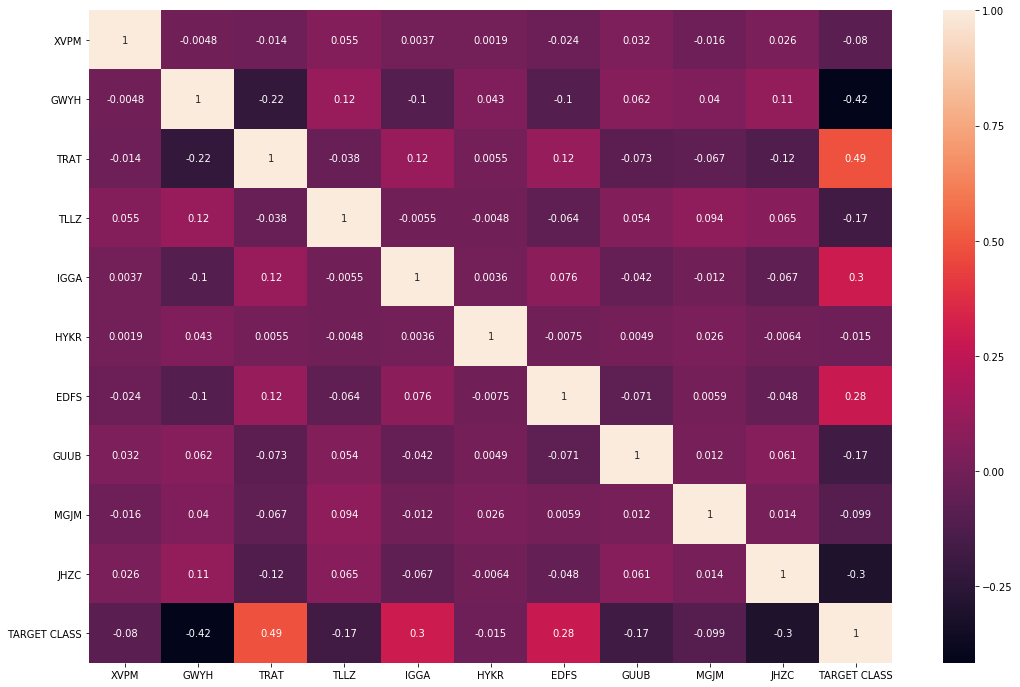

In [64]:
fig, axis = plt.subplots(figsize=(18,12))         # Sample figsize in inches

sns.heatmap(data.corr(), annot = True, ax = axis)

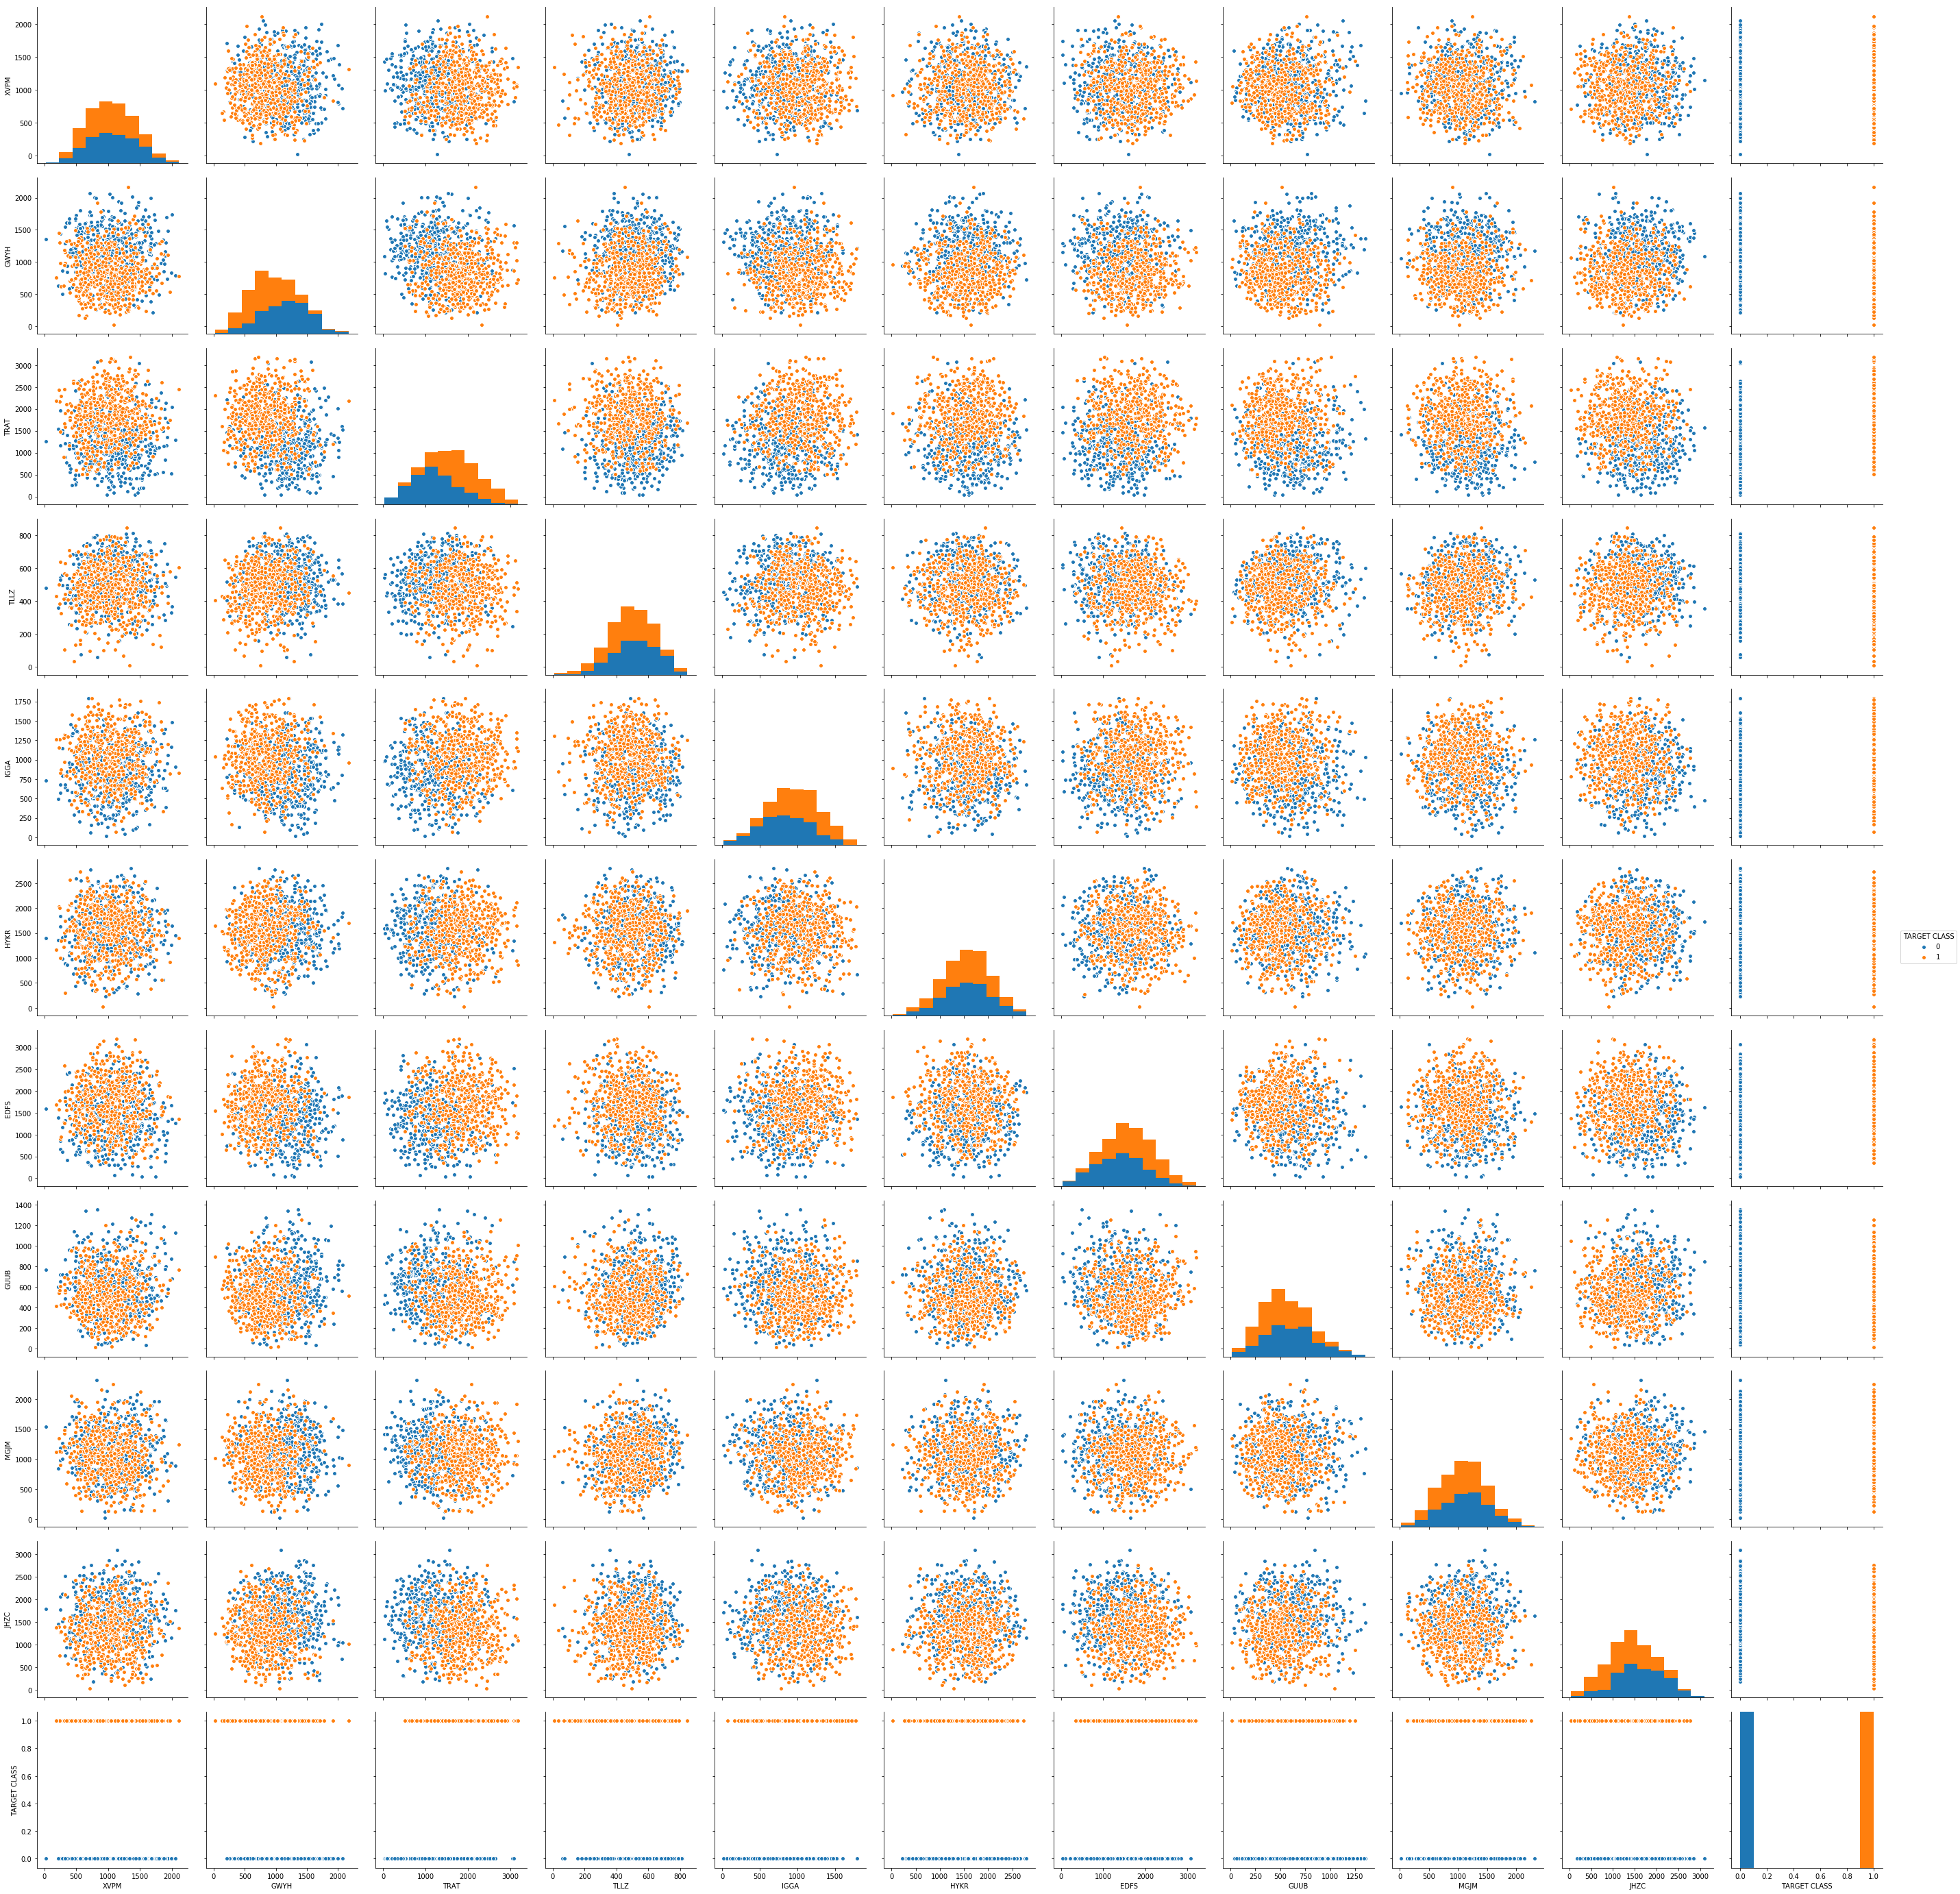

In [67]:
# fig, axis = plt.subplots(figsize=(18,12))         # Sample figsize in inches

sns.pairplot(data, hue = 'TARGET CLASS',size = 3.5)

In [15]:
mms = MinMaxScaler()

In [18]:
X = data.drop('TARGET CLASS', axis = 1)
y = data['TARGET CLASS']

In [17]:
X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [19]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [20]:
mms.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
X = pd.DataFrame(mms.fit_transform(X))

In [22]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.770817,0.370309,0.804966,0.418262,0.299981,0.575371,0.668665,0.236991,0.640471,0.266258
1,0.473432,0.258509,0.829789,0.325119,0.644450,0.743626,0.259619,0.323978,0.509108,0.271472
2,0.610195,0.371486,0.633395,0.618149,0.509431,0.912970,0.248643,0.621579,0.846534,0.528528
3,0.495354,0.486051,0.184296,0.564674,0.226209,0.237874,0.259449,0.245162,0.492291,0.464354
4,0.475788,0.600833,0.291857,0.856246,0.464847,0.485566,0.276074,0.481590,0.224672,0.611149


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.1, random_state = 89)

In [56]:
X_train.shape

(900, 10)

In [57]:
knn = KNeighborsClassifier(n_neighbors = 11)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [59]:
y_pred = knn.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.82      0.87        56
          1       0.80      0.91      0.85        44

avg / total       0.87      0.86      0.86       100



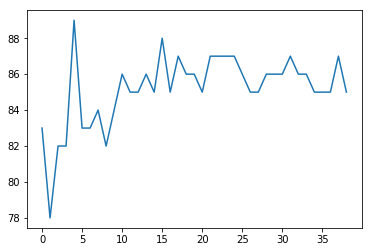

In [61]:
err = []

for i in range(1, 40):
    knn2  = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    err.append((accuracy_score(y_test, y_pred)) * 100)
    
# fig2, axis2 = plt.subplots(figsize=(18,12))         # Sample figsize in inches

plt.plot(err)

In [73]:
err[4]

89.0

In [74]:
plt.style.use('ggplot')

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


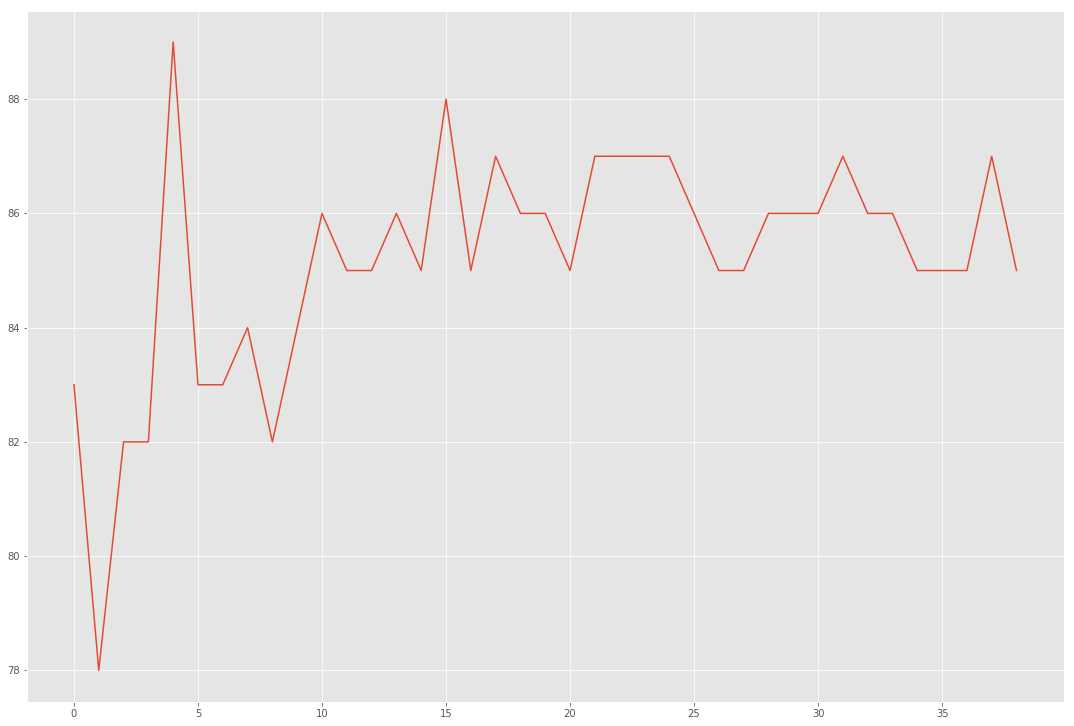

In [76]:
figx = plt.figure(figsize = (18,12))

axisx = figx.add_axes([0.1, 0.1, 0.8, 0.8])

axisx.plot(err)

plt.tight_layout()

In [2]:
help(pd.Categorical)

Help on class Categorical in module pandas.core.arrays.categorical:

class Categorical(pandas.core.arrays.base.ExtensionArray, pandas.core.base.PandasObject)
 |  Represents a categorical variable in classic R / S-plus fashion
 |  
 |  `Categoricals` can only take on only a limited, and usually fixed, number
 |  of possible values (`categories`). In contrast to statistical categorical
 |  variables, a `Categorical` might have an order, but numerical operations
 |  (additions, divisions, ...) are not possible.
 |  
 |  All values of the `Categorical` are either in `categories` or `np.nan`.
 |  Assigning values outside of `categories` will raise a `ValueError`. Order
 |  is defined by the order of the `categories`, not lexical order of the
 |  values.
 |  
 |  Parameters
 |  ----------
 |  values : list-like
 |      The values of the categorical. If categories are given, values not in
 |      categories will be replaced with NaN.
 |  categories : Index-like (unique), optional
 |      The 

In [7]:
sns.light_palette

<function seaborn.palettes.light_palette(color, n_colors=6, reverse=False, as_cmap=False, input='rgb')>

In [17]:
x = pd.Series(np.zeros(928))

In [19]:
type(x)

pandas.core.series.Series

In [21]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [23]:
data['GWYH'].iloc[4]

1313.6790555497525